## Case Study II
Mingjun Ma
ABE 516X

### Introduction
This breakfast cereal data set contains nutritional information for 77 different breafset cereals. It was used for the 1993 Statitical Graphics Exposition as a challenge data set. This data set was retrieved from StatLib at CMU. The nutritional information on a per serving basis for the breakfast cereals including calories, protein, sodium, dietary fiber, complex carbohydrates, sugars, potassium, vitamins, and weight. There is a lot of information for consumer to understand while choosing a good breakfast cereal. 

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Read the data into data frame

In [2]:
cereal = pd.read_csv('cereal.csv')
print(cereal.shape)
cereal.head(10)

(77, 15)


,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbs,sugar,shelf,potassium,vitamins,weight,cups
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,3,280,25,1.00,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,3,135,0,1.00,-1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,3,320,25,1.00,0.33
3,All-Bran_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,3,330,25,1.00,0.50
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.00,0.75
5,Apple_Cin_Cheerios,G,C,110,2,2,180,1.5,10.5,10,1,70,25,1.00,0.75
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14,2,30,25,1.00,1.00
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8,3,100,25,1.33,0.75
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6,1,125,25,1.00,0.67
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5,3,190,25,1.00,0.67


Clean data remove any data that lack of cups information (cups = -1)

In [5]:
rcereal = cereal[cereal.cups > 0]
rcereal.head(10)

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbs,sugar,shelf,potassium,vitamins,weight,cups
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,3,280,25,1.00,0.33
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,3,320,25,1.00,0.33
3,All-Bran_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,3,330,25,1.00,0.50
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.00,0.75
5,Apple_Cin_Cheerios,G,C,110,2,2,180,1.5,10.5,10,1,70,25,1.00,0.75
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14,2,30,25,1.00,1.00
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8,3,100,25,1.33,0.75
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6,1,125,25,1.00,0.67
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5,3,190,25,1.00,0.67
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,2,35,25,1.00,0.75


Make the nutritional value comparable by the serving size. Divide the nutritional value by the number of cup per serving

In [6]:

rcereal.iloc[:, 3:10] = rcereal.iloc[:, 3:10].apply(lambda x : x / rcereal['cups'])
rcereal.iloc[:, 11:14] = rcereal.iloc[:, 11:14].apply(lambda x : x / rcereal['cups'])

In [24]:
rcereal.head(10)

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbs,sugar,shelf,potassium,vitamins,weight,cups
0,100%_Bran,N,C,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,3,848.484848,75.757576,3.030303,0.33
2,All-Bran,K,C,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,3,969.696970,75.757576,3.030303,0.33
3,All-Bran_Extra_Fiber,K,C,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,3,660.000000,50.000000,2.000000,0.50
4,Almond_Delight,R,C,146.666667,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,3,-1.333333,33.333333,1.333333,0.75
5,Apple_Cin_Cheerios,G,C,146.666667,2.666667,2.666667,240.000000,2.000000,14.000000,13.333333,1,93.333333,33.333333,1.333333,0.75
6,Apple_Jacks,K,C,110.000000,2.000000,0.000000,125.000000,1.000000,11.000000,14.000000,2,30.000000,25.000000,1.000000,1.00
7,Basic_4,G,C,173.333333,4.000000,2.666667,280.000000,2.666667,24.000000,10.666667,3,133.333333,33.333333,1.773333,0.75
8,Bran_Chex,R,C,134.328358,2.985075,1.492537,298.507463,5.970149,22.388060,8.955224,1,186.567164,37.313433,1.492537,0.67
9,Bran_Flakes,P,C,134.328358,4.477612,0.000000,313.432836,7.462687,19.402985,7.462687,3,283.582090,37.313433,1.492537,0.67
10,Cap'n'Crunch,Q,C,160.000000,1.333333,2.666667,293.333333,0.000000,16.000000,16.000000,2,46.666667,33.333333,1.333333,0.75


Automatic subseting data by different catagories.

In [22]:
def SelectMfr(mfrName, data): # select different manufacturer
    mfr = data[data['manufacturer'] == mfrName]
    return mfr
def SelectShelf(shelf, data): #Select different shelf place
    shelfNum = data[data['shelf'] == shelf]
    return shelfNum
def SelectNrt(nrt, data): #Select different nuntrition 
    sNrt = data [['name', 'manufacturer', 'type', 'shelf', nrt]]
    return sNrt

In [43]:
mK = SelectMfr('K', rcereal)
mK
shelf = SelectShelf(3, mK)
shelf # test: Extract manufacturer K and shelf 3 procduct

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbs,sugar,shelf,potassium,vitamins,weight,cups
2,All-Bran,K,C,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,3,969.696970,75.757576,3.030303,0.33
3,All-Bran_Extra_Fiber,K,C,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,3,660.000000,50.000000,2.000000,0.50
19,Cracklin'_Oat_Bran,K,C,220.000000,6.000000,6.000000,280.000000,8.000000,20.000000,14.000000,3,320.000000,50.000000,2.000000,0.50
21,Crispix,K,C,110.000000,2.000000,0.000000,220.000000,1.000000,21.000000,3.000000,3,30.000000,25.000000,1.000000,1.00
28,Fruitful_Bran,K,C,179.104478,4.477612,0.000000,358.208955,7.462687,20.895522,17.910448,3,283.582090,37.313433,1.985075,0.67
39,Just_Right_Fruit_Nut,K,C,186.666667,4.000000,1.333333,226.666667,2.666667,26.666667,12.000000,3,126.666667,133.333333,1.733333,0.75
46,Mueslix_Crispy_Blend,K,C,238.805970,4.477612,2.985075,223.880597,4.477612,25.373134,19.402985,3,238.805970,37.313433,2.238806,0.67
49,Nutri-Grain_Almond,K,C,208.955224,4.477612,2.985075,328.358209,4.477612,31.343284,10.447761,3,194.029851,37.313433,1.985075,0.67
53,Product_19,K,C,100.000000,3.000000,0.000000,320.000000,1.000000,20.000000,3.000000,3,45.000000,100.000000,1.000000,1.00
60,Raisin_Squares,K,C,180.000000,4.000000,0.000000,0.000000,4.000000,30.000000,12.000000,3,220.000000,50.000000,2.000000,0.50


In [40]:
fat = SelectNrt('fat', rcereal)
fat #test: Extract only fat data form the rcereal data

,name,manufacturer,type,shelf,fat
0,100%_Bran,N,C,3,3.030303
2,All-Bran,K,C,3,3.030303
3,All-Bran_Extra_Fiber,K,C,3,0.000000
4,Almond_Delight,R,C,3,2.666667
5,Apple_Cin_Cheerios,G,C,1,2.666667
...,...,...,...,...,...
72,Triples,G,C,3,1.333333
73,Trix,G,C,2,1.000000
74,Wheat_Chex,R,C,1,1.492537
75,Wheaties,G,C,1,1.000000


In [27]:
import plotly.express as px

In [29]:
fig = px.scatter_matrix(rcereal, dimensions=['protein', 'fat','sodium', 'fiber', 'carbs', 'sugar', 'potassium','vitamins'], color = 'manufacturer')
fig.show()

In [30]:
fig = px.scatter_matrix(rcereal, dimensions=['protein', 'fat','sodium', 'fiber', 'carbs', 'sugar', 'potassium','vitamins'], color = 'shelf')
fig.show()

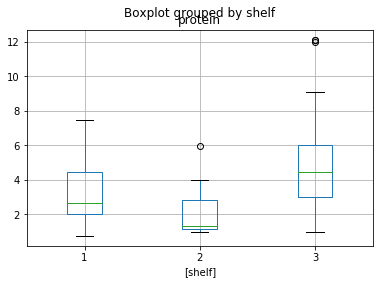

In [39]:
pro = SelectNrt('protein', rcereal)
pro.boxplot(by='shelf') #comparaing the protein value for differen shelf place

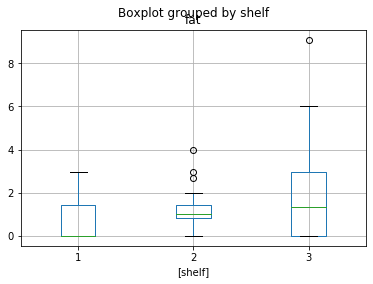

In [41]:
fat.boxplot(by = 'shelf') #comparaing the fat value for differen shelf place

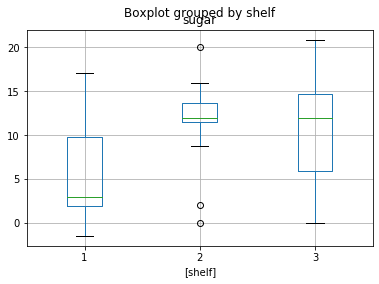

In [42]:
sug = SelectNrt('sugar', rcereal)
sug.boxplot(by = 'shelf') #comparaing the sugar value for differen shelf place

In [51]:
mG = SelectMfr('G', rcereal)
mK.manufacturer = 1
mG.manufacturer = 2
mKG = mK.append(mG, ignore_index=True)
mKG #combine the manufacturer K and G into a new data frame and compare them

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbs,sugar,shelf,potassium,vitamins,weight,cups
0,All-Bran,1,C,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,3,969.696970,75.757576,3.030303,0.33
1,All-Bran_Extra_Fiber,1,C,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,3,660.000000,50.000000,2.000000,0.50
2,Apple_Jacks,1,C,110.000000,2.000000,0.000000,125.000000,1.000000,11.000000,14.000000,2,30.000000,25.000000,1.000000,1.00
3,Corn_Flakes,1,C,100.000000,2.000000,0.000000,290.000000,1.000000,21.000000,2.000000,1,35.000000,25.000000,1.000000,1.00
4,Corn_Pops,1,C,110.000000,1.000000,0.000000,90.000000,1.000000,13.000000,12.000000,2,20.000000,25.000000,1.000000,1.00
5,Cracklin'_Oat_Bran,1,C,220.000000,6.000000,6.000000,280.000000,8.000000,20.000000,14.000000,3,320.000000,50.000000,2.000000,0.50
6,Crispix,1,C,110.000000,2.000000,0.000000,220.000000,1.000000,21.000000,3.000000,3,30.000000,25.000000,1.000000,1.00
7,Froot_Loops,1,C,110.000000,2.000000,1.000000,125.000000,1.000000,11.000000,13.000000,2,30.000000,25.000000,1.000000,1.00
8,Frosted_Flakes,1,C,146.666667,1.333333,0.000000,266.666667,1.333333,18.666667,14.666667,1,33.333333,33.333333,1.333333,0.75
9,Frosted_Mini-Wheats,1,C,125.000000,3.750000,0.000000,0.000000,3.750000,17.500000,8.750000,2,125.000000,31.250000,1.250000,0.80


In [1]:
#Parallel Coordinates plot
fig1 = px.parallel_coordinates(mKG, color = 'manufacturer', dimensions=['protein', 'fat','sodium', 'fiber', 'carbs', 'sugar', 'potassium','vitamins'],color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig1.show()

NameError: name 'px' is not defined

### Discussion
Form the scatter plot above we can see that all of the pair will be positive association. The Fiber and potassium have nerly linear association while fat and carbs do not have a linear association.
For the box plot above shelf 3 has the largest variation overall. The sugar content box plot, shelf 1 and 2 are skewed to the right while shelf 3 skewed to the left. shelf 1 has the lowest median value, while shelf 2 and 3 has the similar median value.
From the parallel coordinates plot, the product difference for manufacturer K and G are very small, since all the lines are mixed toghter. 